In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [95]:
# Carga de los datos de entrenamiento
train_data = pd.read_csv('titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# Carga de los datos de test
test_data = pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
# Porcentaje de mujeres que sobrevivieron
mujeres = train_data.loc[train_data.Sex == 'female']['Survived']
porcentaje_mujeres = sum(mujeres) / len(mujeres)
print(f"% de mujeres que sobrevivieron: {round(porcentaje_mujeres,2)*100}%")

% de mujeres que sobrevivieron: 74.0%


In [98]:
# Porcentaje de hombres que sobrevivieron
hombres = train_data.loc[train_data.Sex == 'male']['Survived']
porcentaje_hombres = sum(hombres) / len(hombres)
print(f"% de hombres que sobrevivieron: {round(porcentaje_hombres,2)*100}%")

% de hombres que sobrevivieron: 19.0%


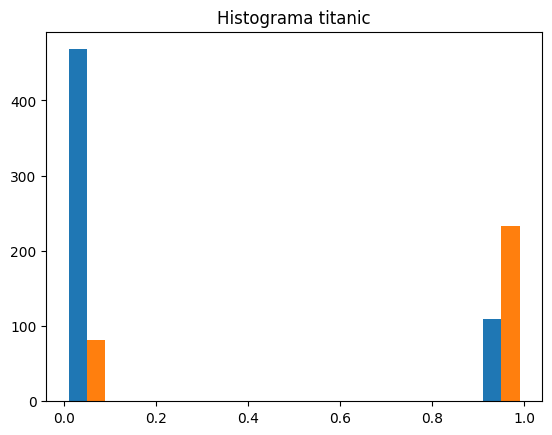

In [99]:
# Gráfico de sobrevivientes
plt.hist(x=[hombres,mujeres])
plt.title("Histograma titanic")
plt.show()

In [100]:
# Variable independiente
y = train_data['Survived']

In [101]:
# Columnas de entrenamiento
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
# Variables independientes
variables = ['Pclass', 'Sex','SibSp', 'Parch','Fare']

## Eliminar nulos

In [103]:
# Media de la tarifa
media = train_data['Fare'].mean()
media

32.204207968574636

In [104]:
# Reemplazo de los valores nulos por la media
train_data['Fare'].replace(np.nan,media,inplace=True)
test_data['Fare'].replace(np.nan,media,inplace=True)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_7492\3963891143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fare'].replace(np.nan,media,inplace=True)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_7492\3963891143.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

## Variables dummies

In [105]:
# Variables categoricas e independientes
X = pd.get_dummies(train_data[variables])
X_test = pd.get_dummies(test_data[variables])

In [106]:
X.head(5)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,1,0,7.2500,False,True
1,1,1,0,71.2833,True,False
2,3,0,0,7.9250,True,False
3,1,1,0,53.1000,True,False
4,3,0,0,8.0500,False,True


## Preparamos el modelo de clasificación

In [107]:
# Creación del modelo
modelo = RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0)
modelo.fit(X,y)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

In [108]:
# Predicciones
predicciones = modelo.predict(X_test)
predicciones

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Creamos dataset con los datos

In [109]:
# Creación del archivo de salida
salida = pd.DataFrame({
    'Identificador':test_data.PassengerId,
    'Superviviente':predicciones
})

salida

,Identificador,Superviviente
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
# Exportación del archivo
salida.to_csv('resultadoTitanic.csv',index=False)